# The effects of the Covid 19 in Argentina using Apache Spark: the difference in between 2019 and 2020 shipments of oilseeds, cereals and subproducts.

We download "https://infra.datos.gob.ar/catalog/sspm/dataset/369/distribution/369.3/download/embarques-de-oleaginosas-y-cereales-mensual.csv", from "datos.gob.ar", using Pandas library. Then we create a dataframe with Pyspark. 
We write the function "grafico_comparacion_por_año" which will show graphs comparing 2019 with 2020 shipments.
Finally we organized the dataframe by product and run the function.

In [11]:
import pandas as pd
from pyspark.sql.session import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import numpy as np
import matplotlib.pyplot as plt
import string

pdDF = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/369/distribution/369.3/download/embarques-de-oleaginosas-y-cereales-mensual.csv')

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

embarques = spark.createDataFrame(pdDF)

def grafico_comparacion_por_año(toneladas2019, toneladas2020, producto):

    x = np.arange(1,13,1)
    y = np.arange(0, 5, 0.5)

    plt.plot(x, toneladas2019, 'b.-', label= (f'Toneladas de {producto} en 2019'))
    plt.plot(x, toneladas2020, 'r.--', label= (f'Toneladas de {producto} en 2020'))
    plt.title(f'Embarques de {producto}', fontdict= {'fontsize':40})
    plt.xlabel('Mes', fontdict = {'fontsize':30})
    plt.ylabel('Peso en toneladas', fontdict = {'fontsize':30})
    plt.gcf().set_size_inches(15, 7)
    plt.xticks(x)
    plt.yticks(y)
    plt.legend(fontsize=15)
    plt.grid()
    plt.show()

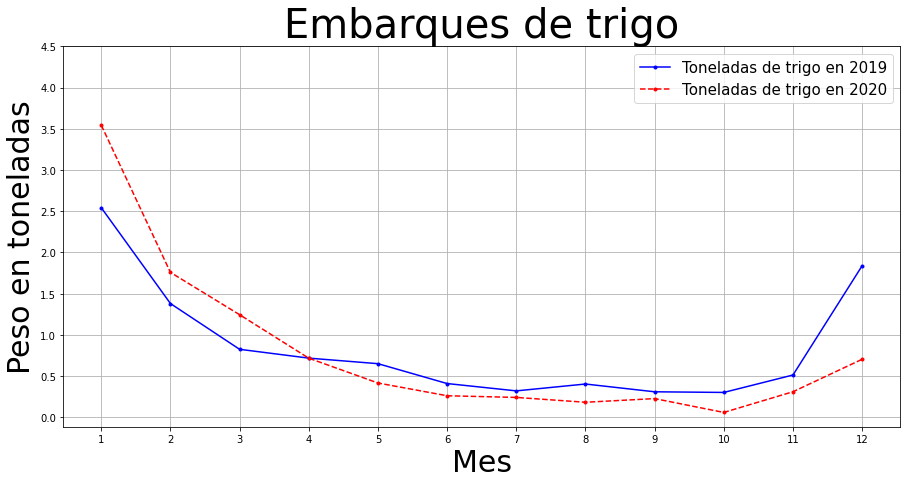

In [9]:
#Trigo
trigo2019 = embarques.select('trigo').where(col('indice_tiempo').startswith('2019'))
toneladas_trigo_2019 = list()
for line in trigo2019.collect():
    line = float(line[0])
    toneladas_trigo_2019.append(line)

trigo2020 = embarques.select('trigo').where(col('indice_tiempo').startswith('2020'))
toneladas_trigo_2020 = list()
for line in trigo2020.collect():
    line = float(line[0])
    toneladas_trigo_2020.append(line)
    
trigo = (toneladas_trigo_2019, toneladas_trigo_2020, 'trigo')

grafico_comparacion_por_año(*trigo)

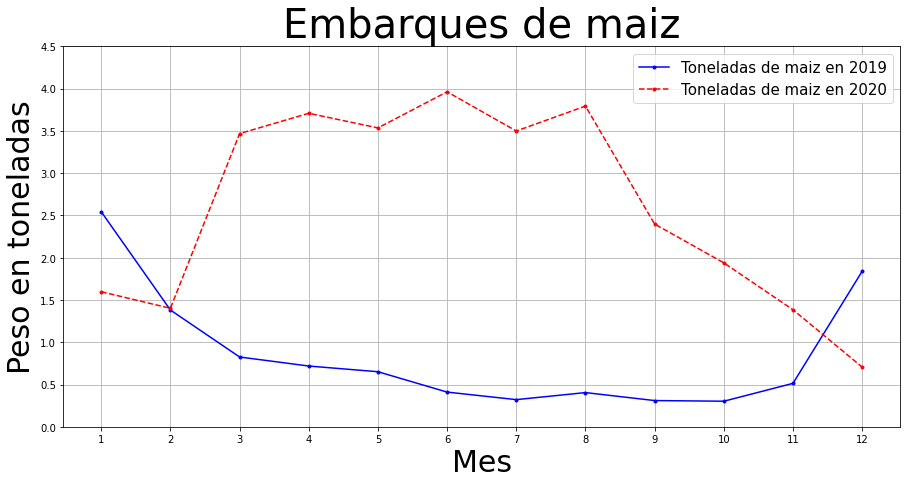

In [41]:
#Maiz
maiz2019 = embarques.select('maiz').where(col('indice_tiempo').startswith('2019'))
toneladas_maiz_2019 = list()
for line in trigo2019.collect():
    line = float(line[0])
    toneladas_maiz_2019.append(line)

maiz2020 = embarques.select('maiz').where(col('indice_tiempo').startswith('2020'))
toneladas_maiz_2020 = list()
for line in maiz2020.collect():
    line = float(line[0])
    toneladas_maiz_2020.append(line)

maiz = (toneladas_maiz_2019,toneladas_maiz_2020,'maiz')

grafico_comparacion_por_año(*maiz)

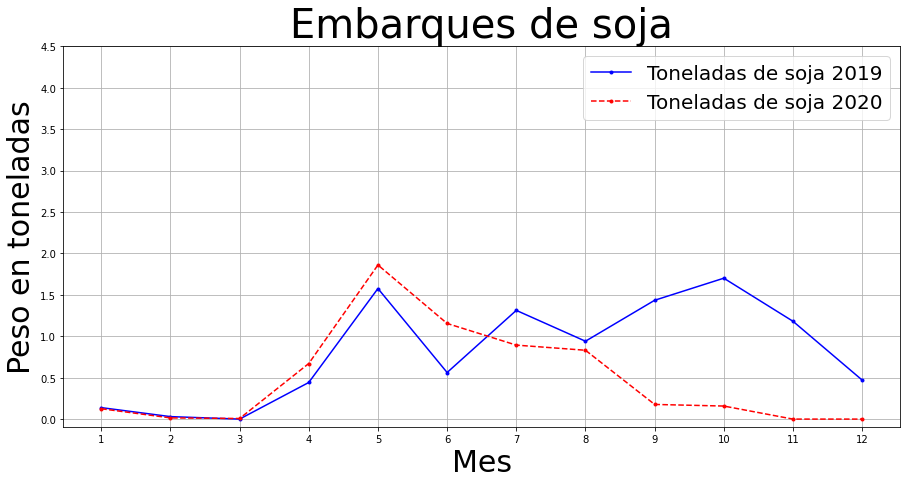

In [34]:
#Soja
soja2019 = embarques.select('poroto_soja').where(col('indice_tiempo').startswith('2019'))
toneladas_soja_2019 = list()
for line in soja2019.collect():
    line = float(line[0])
    toneladas_soja_2019.append(line)

soja2020 = embarques.select('poroto_soja').where(col('indice_tiempo').startswith('2020'))
toneladas_soja_2020 = list()
for line in soja2020.collect():
    line = float(line[0])
    toneladas_soja_2020.append(line)

soja = (toneladas_soja_2019,toneladas_soja_2020,'soja')

grafico_comparacion_por_año(*soja)

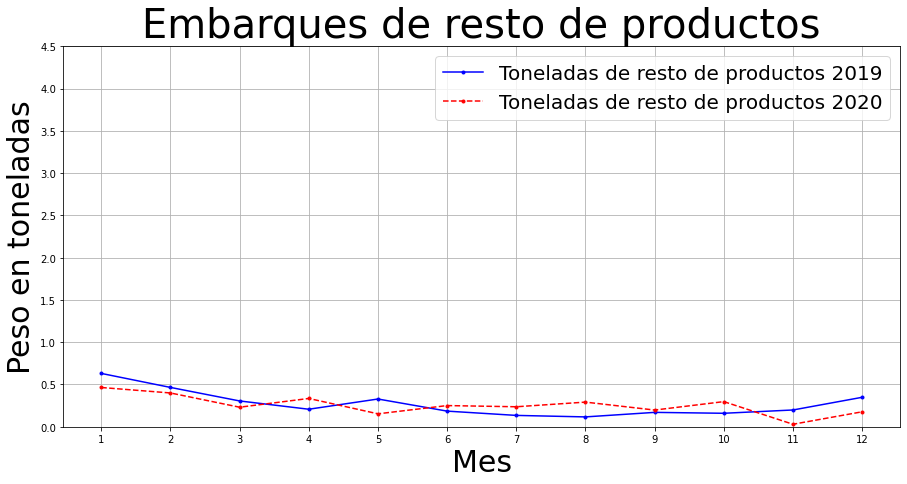

In [35]:
#Resto
resto2019 = embarques.select('resto').where(col('indice_tiempo').startswith('2019'))
toneladas_resto_2019 = list()
for line in resto2019.collect():
    line = float(line[0])
    toneladas_resto_2019.append(line)

resto2020 = embarques.select('resto').where(col('indice_tiempo').startswith('2020'))
toneladas_resto_2020 = list()
for line in resto2020.collect():
    line = float(line[0])
    toneladas_resto_2020.append(line)

resto = (toneladas_resto_2019,toneladas_resto_2020,'resto de productos')

grafico_comparacion_por_año(*resto)

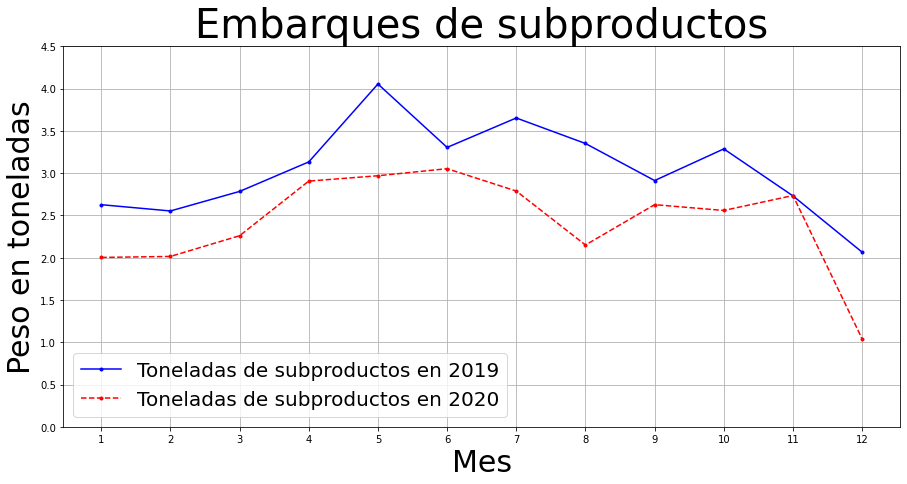

In [38]:
#Subproductos
subproductos2019 = embarques.select('subproductos').where(col('indice_tiempo').startswith('2019'))
toneladas_subproductos_2019 = list()
for line in subproductos2019.collect():
    line = float(line[0])
    toneladas_subproductos_2019.append(line)

subproductos2020 = embarques.select('subproductos').where(col('indice_tiempo').startswith('2020'))
toneladas_subproductos_2020 = list()
for line in subproductos2020.collect():
    line = float(line[0])
    toneladas_subproductos_2020.append(line)

subproductos = (toneladas_subproductos_2019,toneladas_subproductos_2020,'subproductos')

grafico_comparacion_por_año(*subproductos)